In [59]:
import numpy as np
from astropy.io import fits
from scipy.io.idl import readsav
import scipy.signal as signal
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
# from ugdopplerfast import ugdopplerfast

dirpath = '/Users/lpr/Data/fits/pridata/fast/20200929/'
hdu1 = fits.open(dirpath + 'NGC6946-7_onoff-M01_N_0001.fits')
hdu2 = fits.open(dirpath + 'NGC6946-7_onoff-M01_N_0002.fits')

data1 = hdu1[1].data.field('DATA')
data2 = hdu2[1].data.field('DATA')
obstime_in_ut1 = hdu1[1].data.field('UTOBS') # observation time in UT time, unit is day
obstime_in_ut2 = hdu2[1].data.field('UTOBS')

freqbegin = hdu1[1].data.field('FREQ')[0] # beginning of frequency
chanbw = hdu1[1].data.field('CHAN_BW')[0] # frequency step
nchan = hdu1[1].data.field('NCHAN')[0] # number of frequency bin
freq = freqbegin + np.arange(nchan)*chanbw # frequency of sampled data

# merging the data
data = np.concatenate([data1,data2],axis = 0)
obstime_in_ut = np.concatenate([obstime_in_ut1,obstime_in_ut2],axis = 0)

In [109]:
# seperate data in sky and object
minute_in_ut = 1./60./24./10.
start_obstime = obstime_in_ut[0]
cycle_obstime = []
cycle_number = math.ceil((obstime_in_ut[-1]-obstime_in_ut[0])/minute_in_ut)
for num in range(0,cycle_number):
    cycle_obstime.append(start_obstime + 5.5 * num * minute_in_ut)
    cycle_obstime.append(start_obstime + (5.5 * num +5)* minute_in_ut)

In [143]:
# for example, choose 1 cycle(sky and object) of data
cycle1_object_obstime_idx = np.where((obstime_in_ut <= cycle_obstime[1]) & (obstime_in_ut >= cycle_obstime[0]))[0]
# cycle1_object_obstime_idx is two dimensional tuple. how does this problem come out
cycle1_sky_obstime_idx = np.where((obstime_in_ut <= cycle_obstime[3]) & (obstime_in_ut >= cycle_obstime[2]))[0]
# get the data of sky noise and object signal
power1_object = np.average(data[cycle1_object_obstime_idx,:,0:2],axis = 2)
power1_sky = np.average(data[cycle1_sky_obstime_idx,:,0:2],axis = 2)

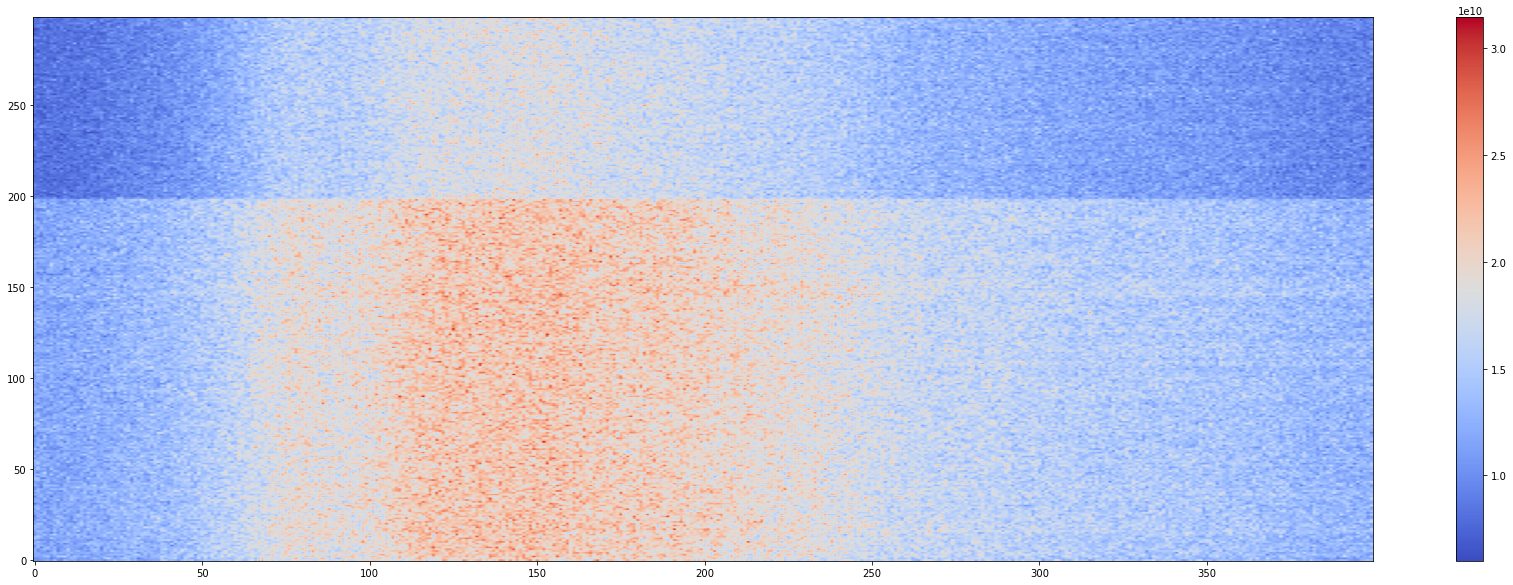

In [186]:
plt.figure(figsize=(30,10))
plt.imshow(power1_object[:,32400:32800],aspect = 'auto',origin = 'lower',cmap = 'coolwarm')
plt.colorbar()
# what's wrong with below plot? does signal end early? from 200th second, signal become weaker.

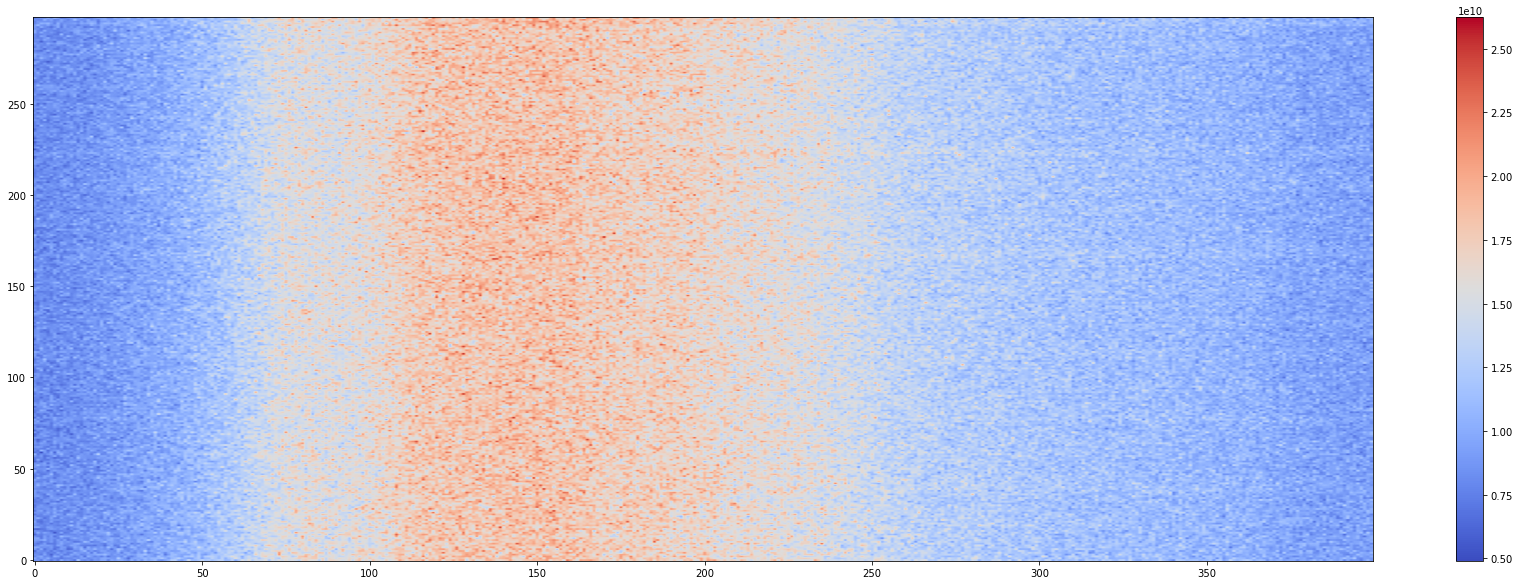

In [187]:
plt.figure(figsize=(30,10))
plt.imshow(power1_sky[:,32400:32800],aspect = 'auto',origin = 'lower',cmap = 'coolwarm')
plt.colorbar()

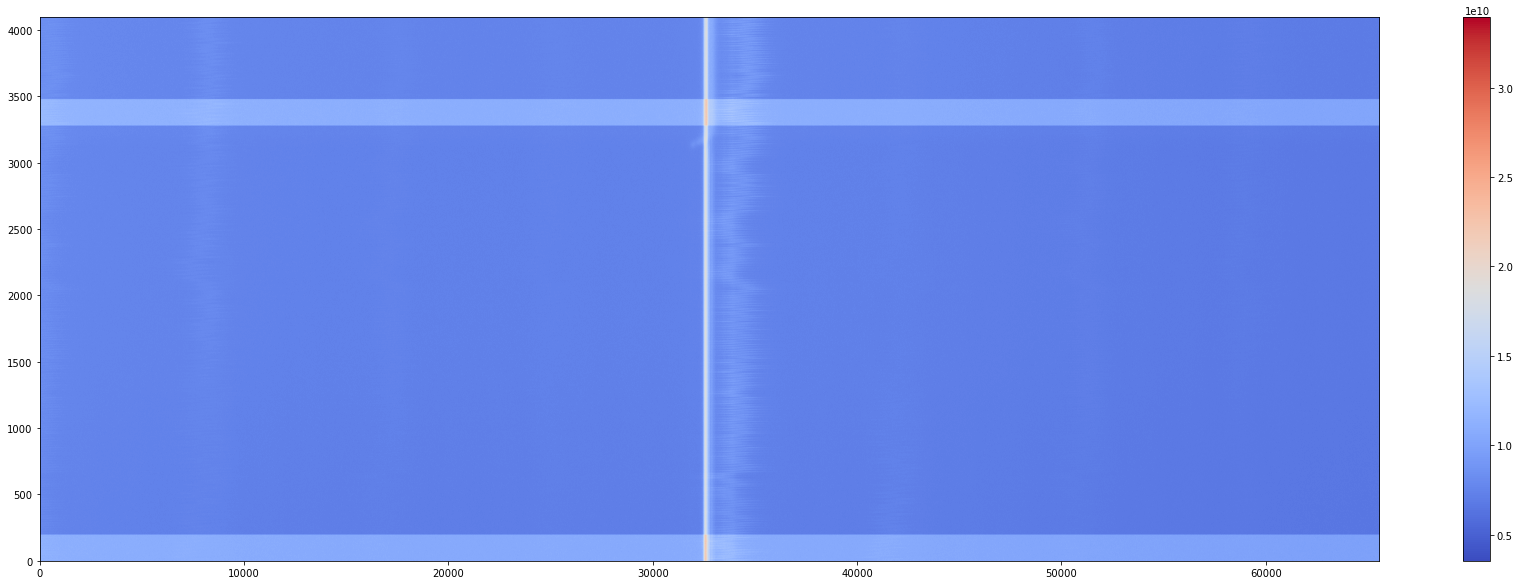

In [188]:
ddd = np.average(data[:,:,0:2],axis=2)
plt.figure(figsize=(30,10))
plt.imshow(ddd,aspect = 'auto',origin = 'lower',cmap = 'coolwarm')
plt.colorbar()
# we can see, the period of "object-overhead-sky" is not 300s+30s+300s
# it's like "overhead-object-sky" is 200s+3078.5s+199s

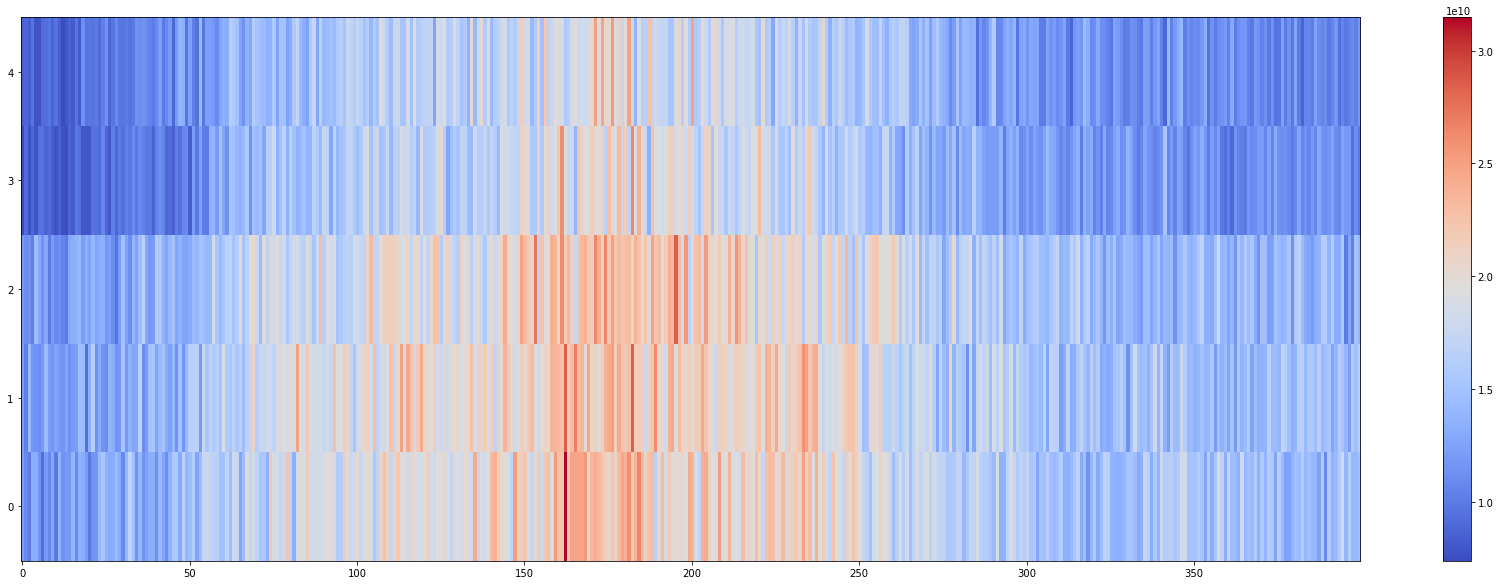

In [199]:
ddd = np.average(data[3475:3480,32400:32800,0:2],axis=2)
plt.figure(figsize=(30,10))
plt.imshow(ddd,aspect = 'auto',origin = 'lower',cmap = 'coolwarm')
plt.colorbar()

In [219]:
# object calibration
power1_object_calon_idx = np.arange(1,power1_object.shape[0],2)
power1_object_caloff_idx = np.arange(2,power1_object.shape[0],2)
power1_object_calon = power1_object[power1_object_calon_idx,:]
power1_object_caloff = power1_object[power1_object_caloff_idx,:]
power1_object_calres = power1_object_calon-power1_object_caloff
# sky calibration
power1_sky_calon_idx = np.arange(1,power1_sky.shape[0],2)
power1_sky_caloff_idx = np.arange(0,power1_sky.shape[0],2) # the spectrum number of sky is 298
power1_sky_calon = power1_sky[power1_sky_calon_idx,:]
power1_sky_caloff = power1_sky[power1_sky_caloff_idx,:]
power1_sky_calres = power1_sky_calon-power1_sky_caloff

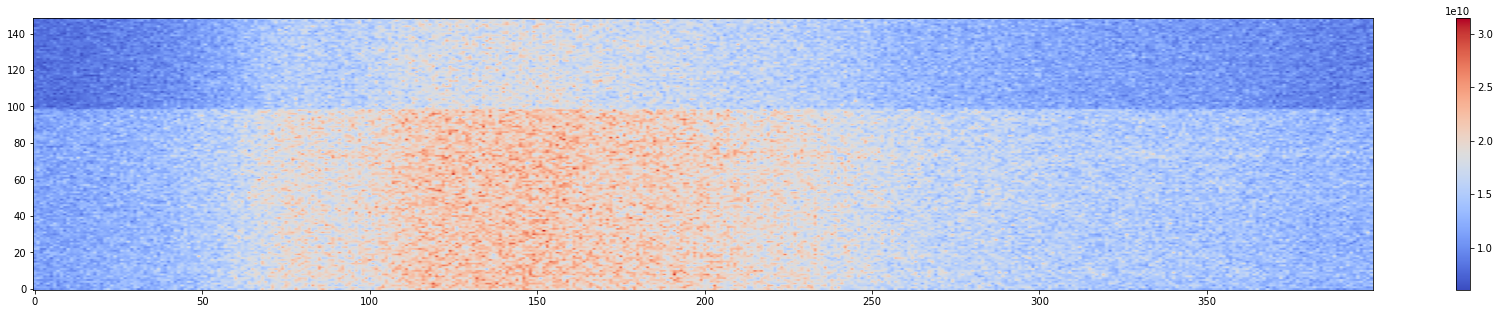

In [220]:
plt.figure(figsize=(30,5))
plt.imshow(power1_object_calon[:,32400:32800], aspect='auto', origin = 'lower',cmap='coolwarm')
plt.colorbar()

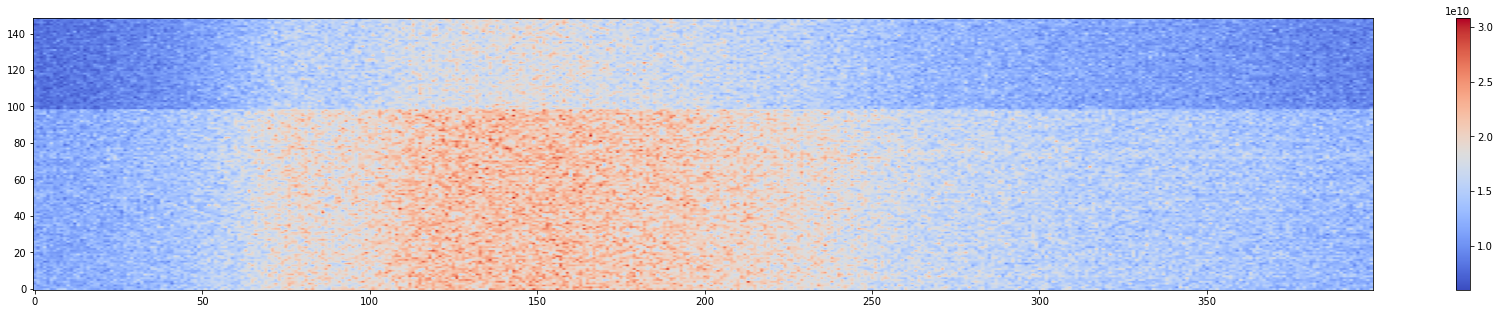

In [221]:
plt.figure(figsize=(30,5))
plt.imshow(power1_object_caloff[:,32400:32800], aspect='auto', origin = 'lower',cmap='coolwarm')
plt.colorbar()

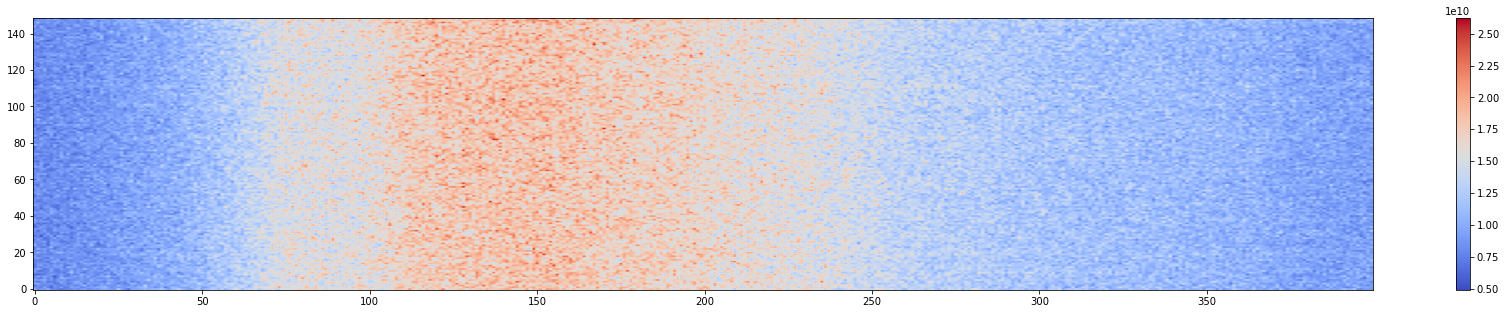

In [222]:
plt.figure(figsize=(30,5))
plt.imshow(power1_sky_calon[:,32400:32800], aspect='auto', origin = 'lower',cmap='coolwarm')
plt.colorbar()

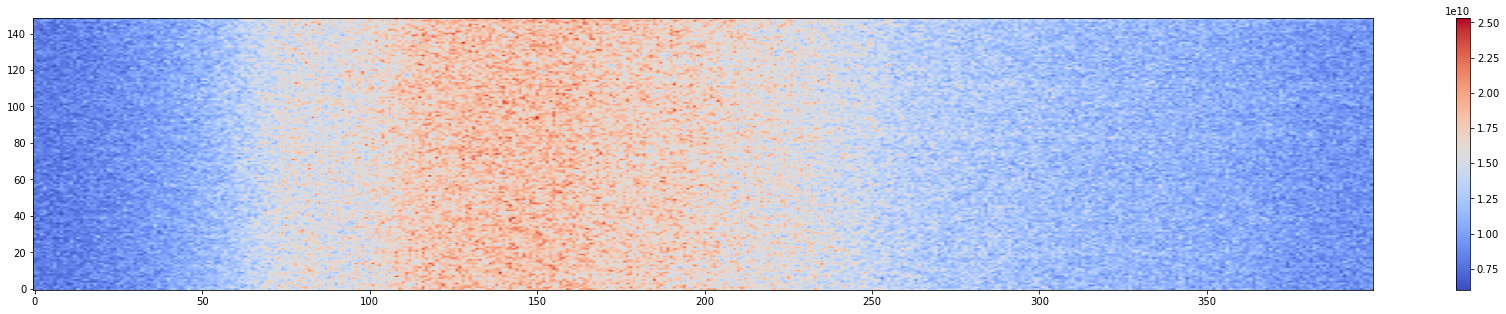

In [223]:
plt.figure(figsize=(30,5))
plt.imshow(power1_sky_caloff[:,32400:32800], aspect='auto', origin = 'lower',cmap='coolwarm')
plt.colorbar()